<a href="https://colab.research.google.com/github/vks2268/hotel_booking_dataAnalysis/blob/main/_Hotel_Booking_Analysis_Capstone_Project_kaveri_shende_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Lets first understand the data before manipulation of the data. In order to understand the problem and then approach the problem,follwing schema is important which is listed below :-
# 1) Extracting the Data
# 2) Framework of data
# 3) Cleaning the data
# 4) Understanding the columns and rows
## 5) EDA and Visulaizations


# **1) Extracting the Data**

In [1]:
#importing the libraries 
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Defining the path of the file
main_df = pd.read_csv("/content/drive/MyDrive/project/Hotel Bookings.csv")

In [6]:
#read the csv file
main_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# 2)  **Framework**

In [7]:
# to know the shape of the dataset
main_df.shape

(119390, 32)

In [8]:
main_df.head()   #Taking a look of the data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


We have 5 rows and 32 columns, now lets see columns name.

In [9]:
#checking tail
main_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [10]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
#to know the columns name
main_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
#checking null values 
main_df.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [13]:
#checking random 7 rows 
main_df.sample(7)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
117569,City Hotel,0,129,2017,August,31,3,0,3,2,...,No Deposit,28.0,NaN,0,Transient,80.10,0,1,Check-Out,2017-08-06
73595,City Hotel,1,116,2017,August,35,27,1,0,3,...,No Deposit,8.0,NaN,0,Transient,185.25,0,2,No-Show,2017-08-27
23600,Resort Hotel,0,0,2016,April,18,28,0,1,2,...,No Deposit,NaN,NaN,0,Transient,50.40,0,0,Check-Out,2016-04-29
88001,City Hotel,0,3,2016,April,18,28,0,1,1,...,No Deposit,9.0,NaN,0,Transient,119.00,0,0,Check-Out,2016-04-29
50312,City Hotel,1,96,2016,April,18,28,0,3,2,...,No Deposit,9.0,NaN,0,Transient,180.30,0,0,Canceled,2016-01-23
19320,Resort Hotel,0,9,2015,December,50,12,0,1,2,...,No Deposit,240.0,NaN,0,Transient,44.40,1,2,Check-Out,2015-12-13
8210,Resort Hotel,1,49,2016,September,39,18,2,0,2,...,No Deposit,240.0,NaN,0,Transient,80.00,0,1,Canceled,2016-09-14


In [14]:
main_df.shape


(119390, 32)

**FINDINGS FROM HOTEL BOOKING DATA SET**


##################

In [15]:
# Determining duplicate values in our Hotel Booking dataset
print(main_df[main_df.duplicated()].shape)
print(main_df.duplicated().sum())

(31994, 32)
31994


##Problem statement

#######

**DATA CLEANING FOR HOTEL BOOKING**

###########

In [16]:
#Creating a copy of dataset
df_hotel = main_df.copy()

In [17]:
#Dropping the duplicate values from hotel booking dataset
df_hotel = df_hotel.drop_duplicates()

In [18]:
#Recheking the shape of our hotel booking dataset after dropping all the duplicates
df_hotel.shape

(87396, 32)

In [19]:
#Recheking our hotel booking dataset wheater they have any more duplicate values.
df_hotel.duplicated().sum()

0

**Now Duplicated data has been removed from hotel booking dataset, but we still have missing values. Let's deal with them**

In [20]:
df_hotel.sample(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
21647,Resort Hotel,0,16,2016,March,10,4,0,2,2,...,No Deposit,240.0,NaN,0,Transient,48.00,0,1,Check-Out,2016-03-06
73379,City Hotel,1,202,2017,August,33,19,2,5,1,...,No Deposit,8.0,NaN,0,Transient,106.59,0,0,Canceled,2017-03-29
84057,City Hotel,0,3,2016,February,8,18,0,1,2,...,No Deposit,9.0,NaN,0,Transient,106.00,0,1,Check-Out,2016-02-19
15424,Resort Hotel,0,59,2015,July,29,14,0,2,3,...,No Deposit,241.0,NaN,0,Transient,97.25,0,3,Check-Out,2015-07-16


In [21]:
# Defining the function 
def null_detail(df):
  hotel_df= pd.DataFrame(index= df.columns, columns=["datatype","null_values", "total_values", "unique_count", "non_null_values" ,"%null_values"])
  hotel_df["datatype"]= [type(i) for i in list(df.columns)]
  hotel_df["null_values"]= [df[i].isnull().sum() for i in list(df.columns)]
  hotel_df["total_values"]= [len(df[i]) for i in list(df.columns)]
  hotel_df["unique_count"]= [len(df[i].unique()) for i in list(df.columns)]
  hotel_df["non_null_values"]= [(~df[i].isnull()).sum() for i in list(df.columns)]
  hotel_df["%null_values"]= [df[i].isnull().mean()*100 for i in list(df.columns)] 
  return hotel_df

In [22]:
null_detail(df_hotel)

,datatype,null_values,total_values,unique_count,non_null_values,%null_values
hotel,<class 'str'>,0,87396,2,87396,0.000000
is_canceled,<class 'str'>,0,87396,2,87396,0.000000
lead_time,<class 'str'>,0,87396,479,87396,0.000000
arrival_date_year,<class 'str'>,0,87396,3,87396,0.000000
arrival_date_month,<class 'str'>,0,87396,12,87396,0.000000
arrival_date_week_number,<class 'str'>,0,87396,53,87396,0.000000
arrival_date_day_of_month,<class 'str'>,0,87396,31,87396,0.000000
stays_in_weekend_nights,<class 'str'>,0,87396,17,87396,0.000000
stays_in_week_nights,<class 'str'>,0,87396,35,87396,0.000000
adults,<class 'str'>,0,87396,14,87396,0.000000


## Total Null Values
*   children = 4
*   Agent = 12193
*   Company = 82137
*   country = 452
#####################

In [23]:
#Company and agent values replaced with zero 
df_hotel[['company','agent']] = df_hotel[['company','agent']].fillna(0)

In [24]:
df_hotel['children'].fillna(df_hotel['children'].mean(), inplace = True)


In [25]:
df_hotel['country'].fillna('others', inplace = True)

In [26]:
null_detail(df_hotel)

,datatype,null_values,total_values,unique_count,non_null_values,%null_values
hotel,<class 'str'>,0,87396,2,87396,0.0
is_canceled,<class 'str'>,0,87396,2,87396,0.0
lead_time,<class 'str'>,0,87396,479,87396,0.0
arrival_date_year,<class 'str'>,0,87396,3,87396,0.0
arrival_date_month,<class 'str'>,0,87396,12,87396,0.0
arrival_date_week_number,<class 'str'>,0,87396,53,87396,0.0
arrival_date_day_of_month,<class 'str'>,0,87396,31,87396,0.0
stays_in_weekend_nights,<class 'str'>,0,87396,17,87396,0.0
stays_in_week_nights,<class 'str'>,0,87396,35,87396,0.0
adults,<class 'str'>,0,87396,14,87396,0.0


In [27]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

**Converting Datatypes**

In [28]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df_hotel[['children', 'company', 'agent']] = df_hotel[['children', 'company', 'agent']].astype('int64')


In [29]:
# changing datatype of column 'reservation_status_date' to data_type.
df_hotel['reservation_status_date'] = pd.to_datetime(df_hotel['reservation_status_date'], format = '%Y-%m-%d')

**Adding Required Columns**

In [30]:
# Adding total staying days in hotels
df_hotel['total_stay'] = df_hotel['stays_in_weekend_nights']+df_hotel['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df_hotel['total_people'] = df_hotel['adults']+df_hotel['children']+df_hotel['babies']

In [31]:
df_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay,total_people
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,...,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567,3.630658,2.025253
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,...,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946,2.763449,0.794319
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000,3.000000,2.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000,5.000000,2.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,69.000000,55.000000


**EDA**

We will firts find the realtionship between the numerical data

Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type. So we wont need to check them for correlation.


Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [32]:
correlation = df_hotel[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


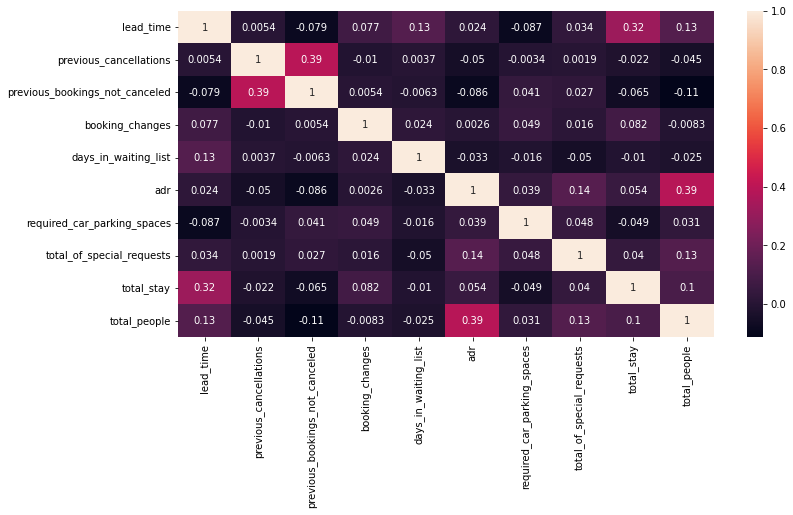

In [33]:
#correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation.corr(), annot=True)

**Plotting a box plot understnding the the outlier**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

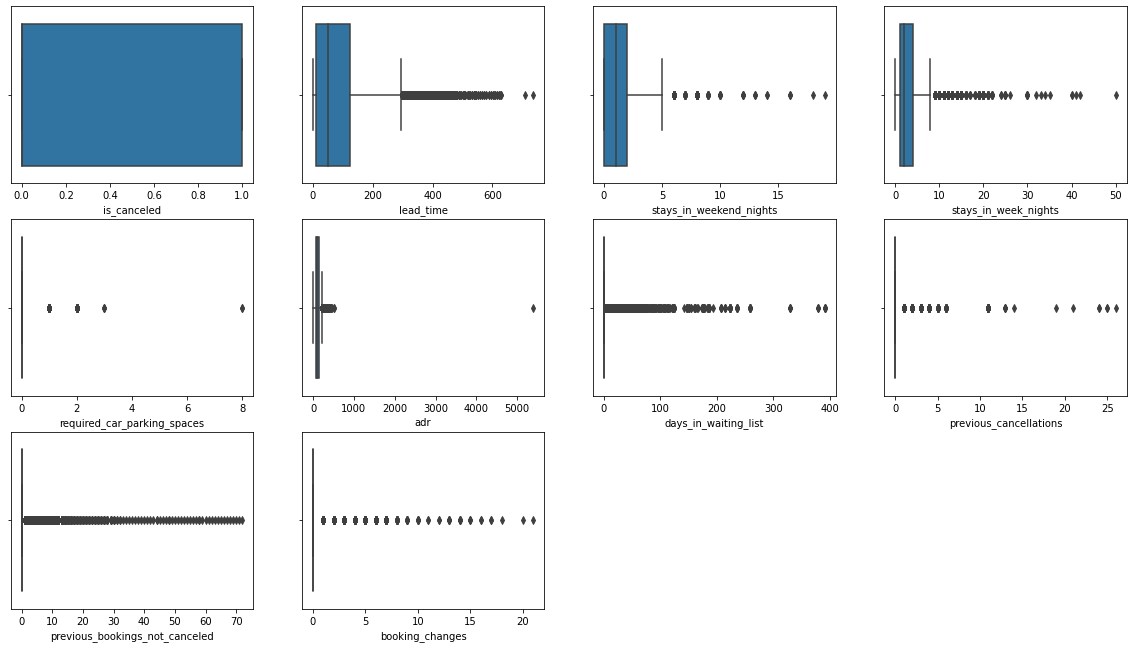

In [34]:
# defining a variable containing all the numerical columns
columns = ['is_canceled', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'required_car_parking_spaces', 'adr','days_in_waiting_list', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1

# plotting box plot using matplotlib

plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df_hotel[column])

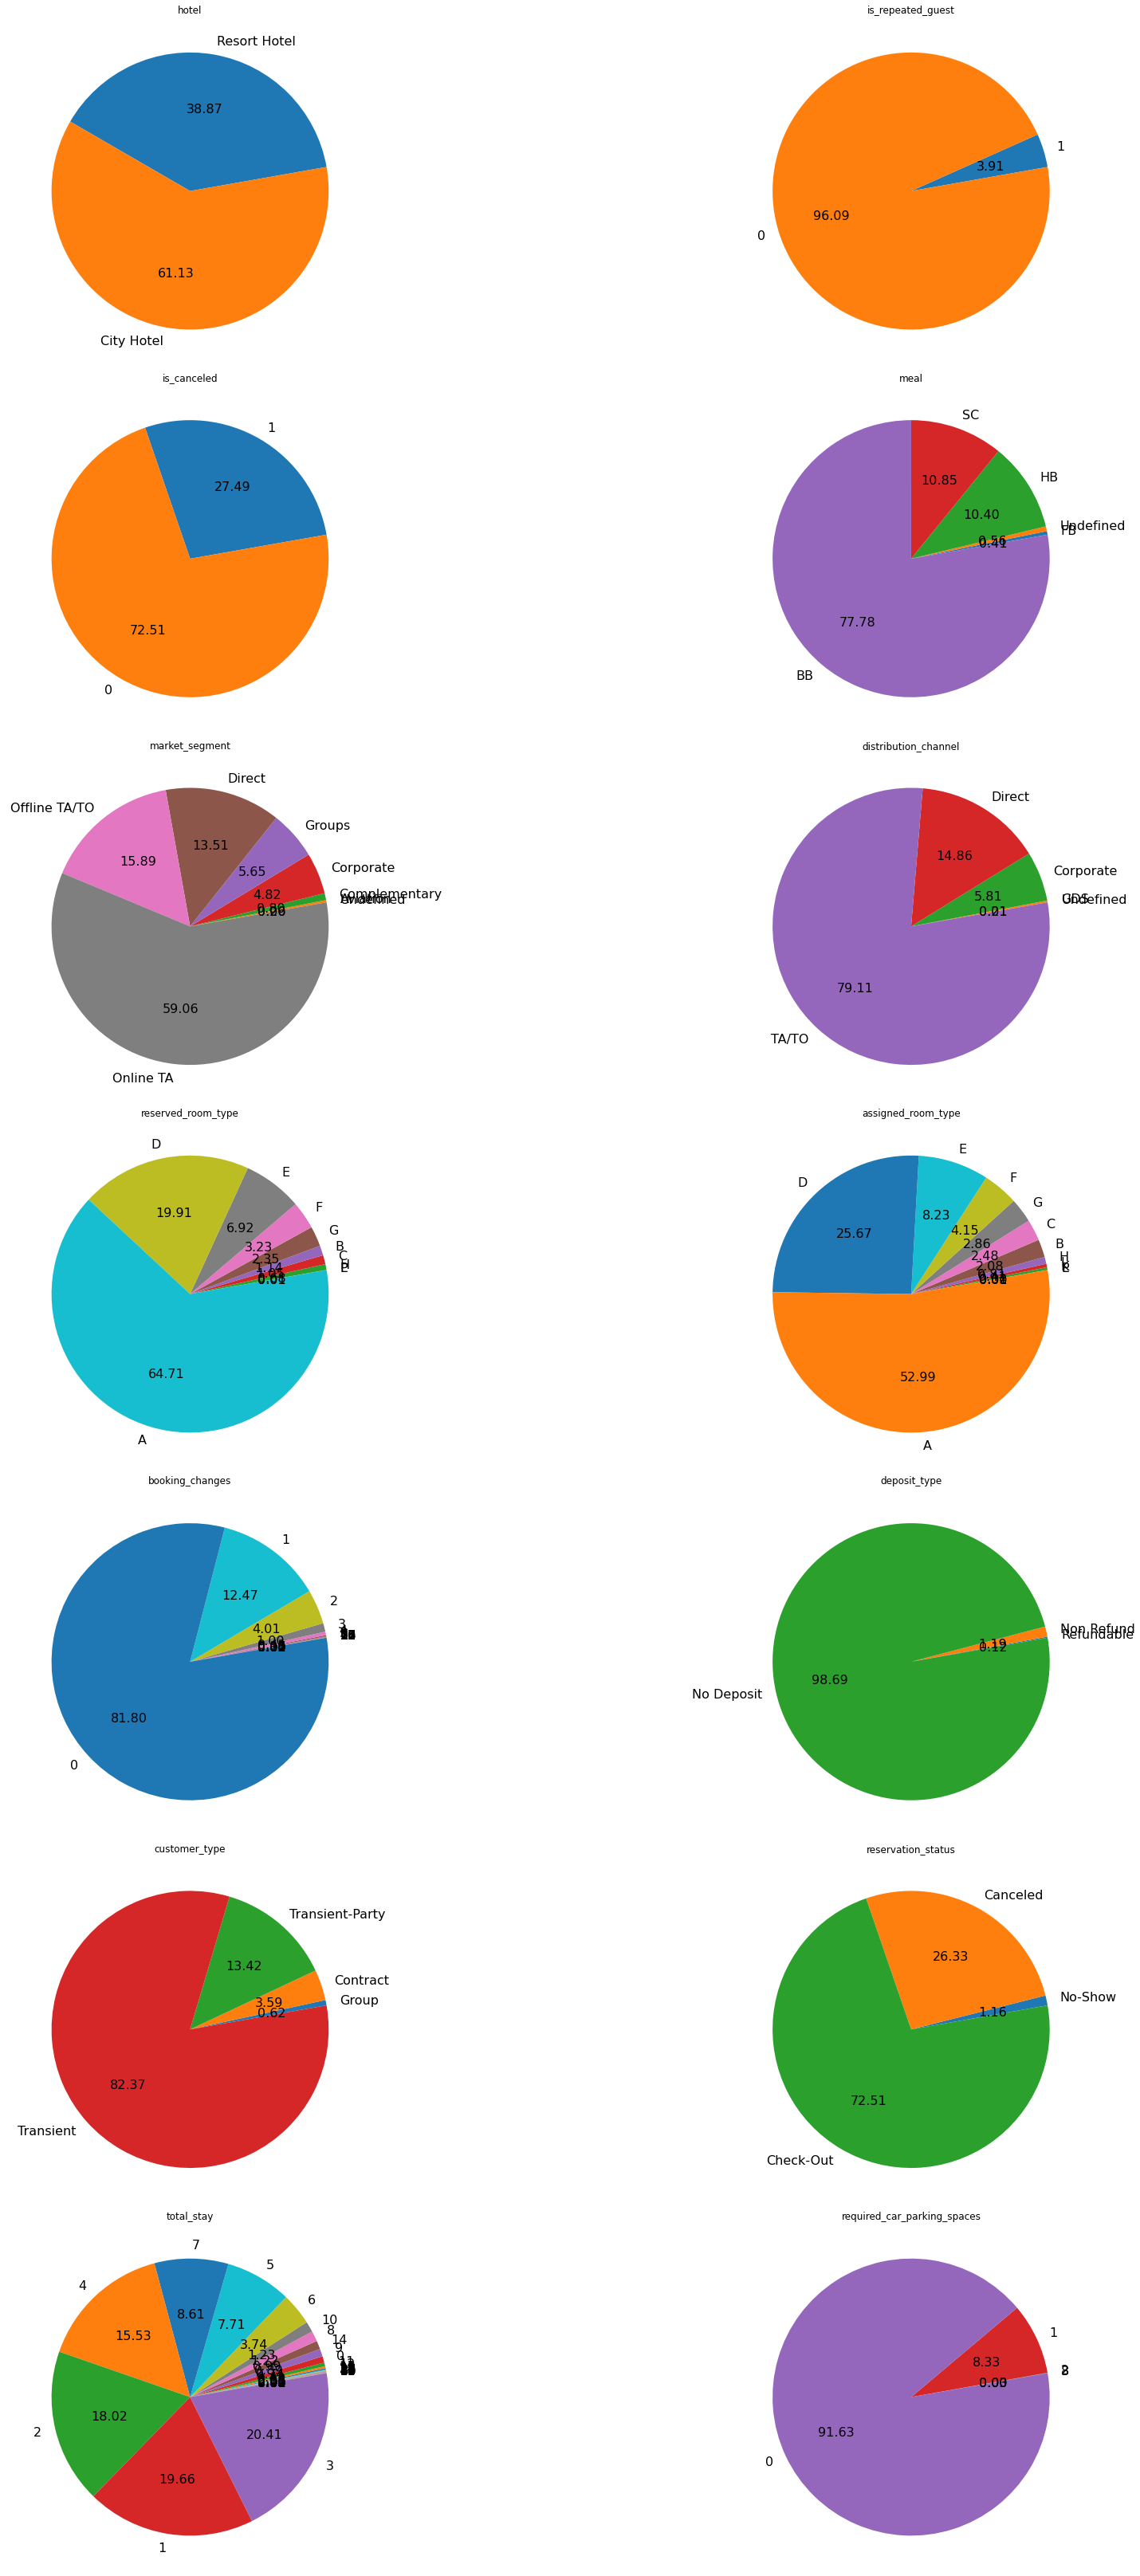

In [35]:
# defining the columns we want to analyse
columns = ['hotel', 'is_repeated_guest', 'is_canceled', 'meal', 'market_segment', 'distribution_channel','reserved_room_type', 
           'assigned_room_type','booking_changes', 'deposit_type', 'customer_type', 'reservation_status', 'total_stay', 'required_car_parking_spaces']


# creating plot of the data. Subplot is used when we want to build multiple charts side by side.
# (6,2) is the rows and columns grid of the chart we want to specify. If we keep it as (6,3) i.e. 6 rows and 3 columns will display chart.
#figsize is to adjust the size of the plot
fig, axes = plt.subplots(7, 2, figsize=(30, 45))

# defining a variable and using a loop to pull each index column of the list defined and plot its chart
axes = [ax for axes_row in axes for ax in axes_row]


for i, c in enumerate(df_hotel[columns]):
         df_hotel[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.2f', fontsize=16,startangle=10)
         axes[i].set_ylabel(' ')
    
plt.tight_layout()

**Scattter Plot**

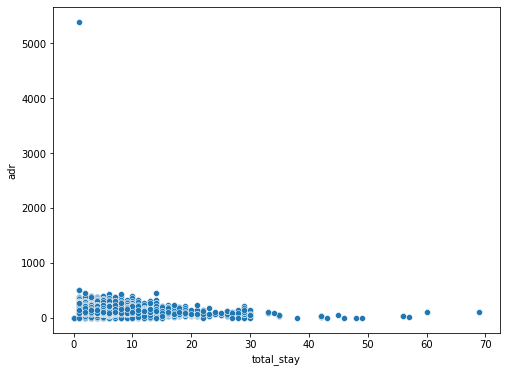

In [36]:
plt.figure(figsize = (8,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df_hotel)
plt.show()

In [37]:
df_hotel.drop(df_hotel[df_hotel['adr'] > 5000].index, inplace = True)

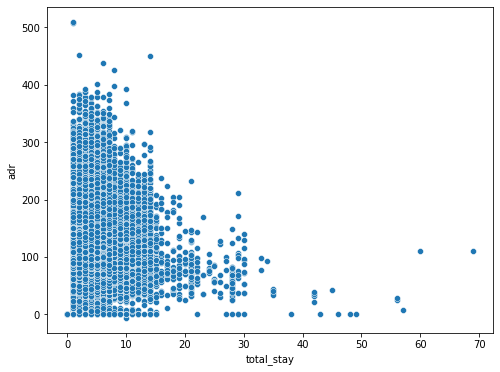

In [38]:
plt.figure(figsize = (8,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df_hotel)
plt.show()

**Let's start with data analysis on Hotel Booking**

### Q1) What is the % of total number of hotelwise booking and total number of people who booked the hotel?

#####Since there are only 2 types (resort or city), we will use a barchart or pie chart to show.

([<matplotlib.patches.Wedge at 0x7fb214ef2b90>,
 [Text(-1.0334054282855825, -0.37692601500810746, 'City Hotel'),
  Text(1.1273513763115448, 0.41119201637248076, 'Resort Hotel')],
 [Text(-0.5636756881557722, -0.20559600818624044, '61.1%'),
  Text(0.6576216361817343, 0.23986200955061376, '38.9%')])

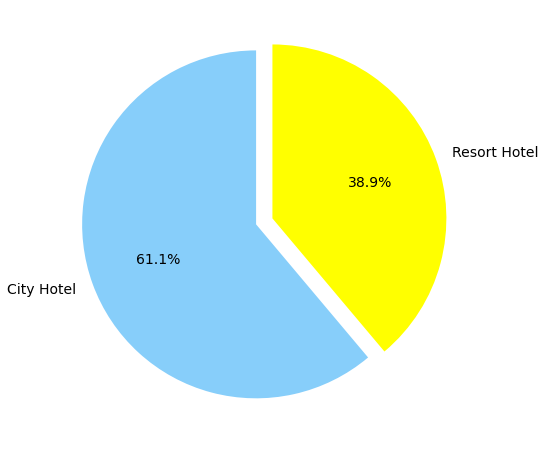

In [ ]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df_hotel['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = df_hotel['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['lightskyblue','yellow']

# Putting them together. Sizes with the count, explode with the magnitude of separation between pies, colors with the colors, 
# autopct enables you to display the percent value using Python string formatting. .1f% will round off to the tenth place.
# startangle will allow the percentage to rotate counter-clockwise. Lets say we have 4 portions: 10%, 30%, 20% and 40%. The pie will rotate from smallest to the biggest (counter clockwise). 10% -> 20% -> 30% -> 40%
# We have only 2 sections so anglestart does not matter
# textprops will adjust the size of text
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

2) Which hotel has the most cancelllation rate in %


In [ ]:
# Creating the table of total bookings hotelwise.
#df_total_bookings =  df_hotel.groupby(["hotel"])["is_canceled"].count().reset_index().rename(columns ={"hotel" : "Hotel Type", "is_canceled" : "Total Bookings"})

# Creating a table of canceled bookings hotelwise.
#df_c =  df_hotel[ df_hotel["is_canceled"]==1]
#df_canceled_bookings = df_c.groupby(["hotel"])["is_canceled"].count().reset_index().rename(columns = {"hotel" : "Hotel Type", "is_canceled" : "Canceled Bookings"})

In [ ]:
df_hbc = pd.merge(df_total_bookings, df_canceled_bookings, how = "left", left_on = "Hotel Type", right_on ="Hotel Type")

# Adding a column of percentage canceled booking.
df_hbc["Percentage Cancellation"] = round((df_hbc["Canceled Bookings"] * 100) / df_hbc["Total Bookings"], 2)
df_hbc

,Hotel Type,Total Bookings,Canceled Bookings,Percentage Cancellation
0,City Hotel,53427,16048,30.04
1,Resort Hotel,33968,7976,23.48


([<matplotlib.patches.Wedge at 0x7fb215dfd050>,
 [Text(-1.0334054282855825, -0.37692601500810746, 'City Hotel'),
  Text(1.1273513763115448, 0.41119201637248076, 'Resort Hotel')],
 [Text(-0.5636756881557722, -0.20559600818624044, '61.1%'),
  Text(0.6576216361817343, 0.23986200955061376, '38.9%')])

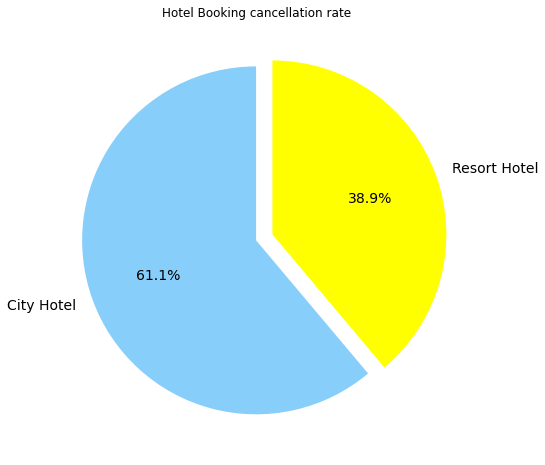

In [ ]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df_hotel['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = df_hotel['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['lightskyblue','yellow']

# Putting them together. Sizes with the count, explode with the magnitude of separation between pies, colors with the colors, 
# autopct enables you to display the percent value using Python string formatting. .1f% will round off to the tenth place.
# startangle will allow the percentage to rotate counter-clockwise. Lets say we have 4 portions: 10%, 30%, 20% and 40%. The pie will rotate from smallest to the biggest (counter clockwise). 10% -> 20% -> 30% -> 40%
# We have only 2 sections so anglestart does not matter
# textprops will adjust the size of text
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})